<a href="https://colab.research.google.com/github/Pongpang-2102/Programming_and_Data_Science_Project_2022-2024/blob/main/Puriwat_Red_Wine_Quality_Prediction_Linear_Regression_(25_Sep_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework (Linear Regression & Logistic Regression Analysis)

- Subject : Applied Statistical Modeling & Data Analytics  (K-DAI)
- Due date : 28-Sep-22
- Author : Puriwat Sangrawee ( นายภูริวัฒน์ แสงระวี)
- Student ID : 65056071  (1st year student at KDAI)      
- This file is part 1 of total 2 parts



# Part 1. Linear Regression 

## 1.1 Dateset Reference

- ในการวิเคราะห์ข้อมูลด้วย Linear Regresssion ผมใช้ Dataset จาก Kaggle ในหัวข้อเรื่อง `Red Wine Quality` 

-  โดยสามารถ download dataset นีได้จาก https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?fbclid=IwAR0yDW_kdve_9udWcqXme6ASt6VzEiclB5u1TIHabsKqcqO-R4UyJO_VRtw

## 1.2 Step of Study

### 1.2.0 Import Dataset , Neccessary Library  and Data Overview

In [ ]:
# 1.2.0.1 import library

# to deal with dataframe 
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to deal with statistics
import statsmodels.api as sm
import scipy.stats

# to plot linear regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score ,classification_report, confusion_matrix , accuracy_score
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to read file and store it at object df
df = pd.read_csv('/content/drive/MyDrive/# K-Dai Dataset/winequality-red.csv')

# to view the number of row and column for this dataframe
print("Number of  Row and column :\nRow = ",df.shape[0],"\nColumn =",df.shape[1] )


Number of  Row and column :
Row =  1599 
Column = 12


In [ ]:
# to view all column name
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# to view data head
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# to view data tail
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# to view overall info of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 1.2.1 Splitting data 

- Split data to be 2 subgroup `training_data` and  `testing_data` respectively

In [ ]:
# split date to df_train (training_set) and df_test (testing set) using ratio for train : test = 80 : 20
# this case we will set seed using number 
df_train , df_test = train_test_split(df , test_size = 0.2 , random_state = 1994)

### 1.2.2 Basic Statistical Analysis for All Variables

- Number of Samples
- Central Tendency (Mean , Median . Mode , Standard Deviation SD) 
- Quatile (Q2 , Q3)

#### 1.2.2.1  Whole dataset (100%)

In [ ]:
# to view overall statistics  of whole dataset (100%)

# to view Mean , SD , Q1 - Q3 , max , min , count of whole dataset (df)
df.describe()

# 25% and 75% are 25th Percentile and 75th Percentile (AKA Q2 and Q3 respectively)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# to view median of whole dataset 
df.median()


fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [ ]:
# to view mode of whole dataset
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


#### 1.2.2.2 Training data (df_train)

In [ ]:
# to view shape of df_train 
df_train.shape

(1279, 12)

In [ ]:
# to view overall statistics  of Training data (80%)

# to view Mean , SD , Q1 - Q3 , max , min , count of df_train
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.00000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.00000,1279.000000,1279.000000,1279.000000
mean,8.338937,0.529961,0.26785,2.522088,0.087997,16.090305,46.627443,0.996789,3.30785,0.657576,10.392859,5.641126
std,1.710627,0.181978,0.19339,1.376675,0.046524,10.519686,32.473099,0.001844,0.15246,0.169735,1.035072,0.796253
min,4.600000,0.120000,0.00000,0.900000,0.012000,1.000000,6.000000,0.990070,2.86000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.09000,1.900000,0.071000,8.000000,23.000000,0.995680,3.21000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.25000,2.200000,0.080000,14.000000,38.000000,0.996800,3.31000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.42000,2.600000,0.091000,22.000000,62.000000,0.997835,3.40000,0.730000,11.000000,6.000000
max,15.600000,1.580000,0.79000,15.500000,0.611000,72.000000,289.000000,1.003690,4.01000,1.980000,14.000000,8.000000


In [ ]:
# to view median of Training data (df_train)
df_train.median()


fixed acidity            7.9000
volatile acidity         0.5200
citric acid              0.2500
residual sugar           2.2000
chlorides                0.0800
free sulfur dioxide     14.0000
total sulfur dioxide    38.0000
density                  0.9968
pH                       3.3100
sulphates                0.6200
alcohol                 10.1000
quality                  6.0000
dtype: float64

In [ ]:
# to view mode of Training data (df_train)
df_train.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.5,0.0,2.0,0.08,6.0,28.0,0.9968,3.36,0.54,9.5,5


#### 1.2.2.3 Testing data (df_test)

In [ ]:
# to view shape of df_test
df_test.shape

(320, 12)

In [ ]:
# to view overall statistics  of testing data (20%)

# to view Mean , SD , Q1 - Q3 , max , min , count of df_test
df_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,8.24250,0.519266,0.283469,2.605625,0.085347,15.014062,45.829687,0.996577,3.324156,0.660437,10.543385,5.615625
std,1.85871,0.166884,0.200162,1.536152,0.049188,10.189457,34.576840,0.002044,0.161445,0.168837,1.174104,0.852292
min,4.70000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990200,2.740000,0.390000,8.400000,3.000000
25%,7.00000,0.390000,0.100000,1.900000,0.069000,6.000000,20.000000,0.995417,3.220000,0.560000,9.537500,5.000000
50%,7.80000,0.520000,0.270000,2.200000,0.078000,13.000000,35.000000,0.996620,3.310000,0.620000,10.200000,6.000000
75%,9.22500,0.620000,0.440000,2.600000,0.090000,20.000000,62.250000,0.997837,3.410000,0.722500,11.325000,6.000000
max,15.90000,1.185000,1.000000,13.900000,0.610000,68.000000,278.000000,1.003150,3.900000,2.000000,14.900000,8.000000


In [ ]:
# to view median of testing data (df_test)
df_test.median()

fixed acidity            7.80000
volatile acidity         0.52000
citric acid              0.27000
residual sugar           2.20000
chlorides                0.07800
free sulfur dioxide     13.00000
total sulfur dioxide    35.00000
density                  0.99662
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [ ]:
# to view mode of testing data (df_test)
df_test.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.6,0.0,2.0,0.082,6.0,18.0,0.9972,3.3,0.6,9.5,5.0
1,7.2,NaN,NaN,NaN,NaN,NaN,NaN,0.9994,NaN,NaN,NaN,NaN
2,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2.3 Missing Value Detection & Elimination

#### 1.2.3.1 Missing Value Detection

In [ ]:
# to check nunmber of missing value
df.isna().sum().sum()

0

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 1.2.3.2 Missing Value Elimination

- No Missing value found : Elimination is no need

### 1.2.4 Exploratory Data Analysis (EDA) of your variable Y

#### 1.2.4.1 Define your X (Independent variable)

In [ ]:
# to view column  name in df_train
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# first time selection for X , All column (but quality) will be selected

# quality column (select value = 1 for column mode) will be dropped (It will be our target later)
x_train = df_train.drop('quality',1)
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1438,7.0,0.59,0.00,1.7,0.052,3.0,8.0,0.99600,3.41,0.47,10.3
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5
938,7.2,0.38,0.38,2.8,0.068,23.0,42.0,0.99356,3.34,0.72,12.9
215,7.0,0.49,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5
60,8.8,0.40,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2


In [ ]:
# and for x test

x_test = df_test.drop('quality',1)
x_test.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

#### 1.2.4.1 Define your Y (Dependent Variable)

In [ ]:
y_train = df_train['quality']
y_train.head()

1438    5
1092    6
938     7
215     5
60      5
Name: quality, dtype: int64

In [ ]:
y_test = df_test['quality']
y_test

875     7
772     5
1395    6
1078    5
1489    6
       ..
755     6
206     7
955     5
1293    4
1060    6
Name: quality, Length: 320, dtype: int64

#### 1.2.4.2 EDA for Your Y

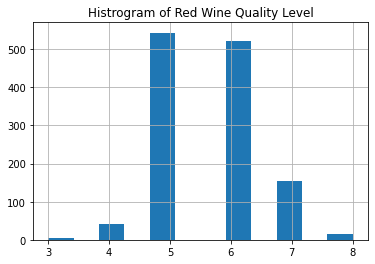

In [ ]:
# we will use histrogram to view our quality level distribution

df_train['quality'].hist(bins=12, rwidth=5, figsize=(6,4))
plt.title('Histrogram of Red Wine Quality Level')
plt.show()


### 1.2.5 Ask your own  Questions

#### 1.2.5.1 Your own Questions

- Q1. How about effect of Salt Level (% Choride) to Quality of Red Wine
- Q2. How about effect of Alcohol level (%) to Quality of Red Wine
- Q3. How about effect of pH Level to Quality of Red Wine 
- Q4. How about effect of Volatile Acidity level to Quality of Red Wine 


#### 1.2.5.2 Use Visualization to answer my own question

- This case , all of our data are numerical value. so , Scatter chart will be applied

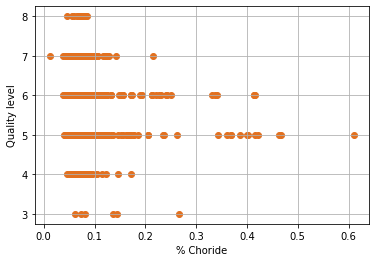

In [ ]:
# Q1. How about effect of Salt Level (% Choride) to Quality of Red Wine
plt.scatter(  df_train['chlorides'], df_train['quality'] ,  color = '#E2701F')
plt.xlabel('% Choride')
plt.ylabel('Quality level')
plt.grid()
plt.show()


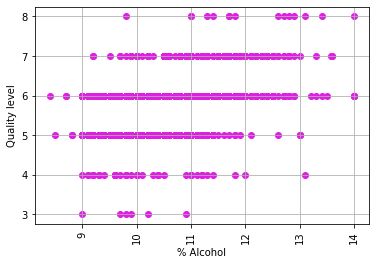

In [ ]:
# Q2. How about effect of Alcohol level (%) to Quality of Red Wine

plt.scatter(  df_train['alcohol'], df_train['quality'] ,  color = '#DE1FE2')
plt.xlabel('% Alcohol')
plt.ylabel('Quality level')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

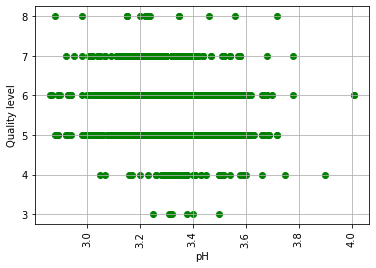

In [ ]:
# Q3. How about effect of pH Level to Quality of Red Wine

plt.scatter(  df_train['pH'], df_train['quality'] ,  color = 'green')
plt.xlabel('pH')
plt.ylabel('Quality level')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()


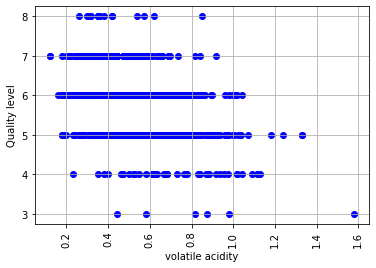

In [ ]:
# Q4. How about effect of Volatile Acidity level to Quality of Red Wine

plt.scatter(  df_train['volatile acidity'], df_train['quality'] ,  color = 'blue')
plt.xlabel('volatile acidity')
plt.ylabel('Quality level')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()


### 1.2.6 Correlation Representation

- between independent variable (X) and Dependent Variable (Y)

#### 1.2.6.1 Pearson Correlation

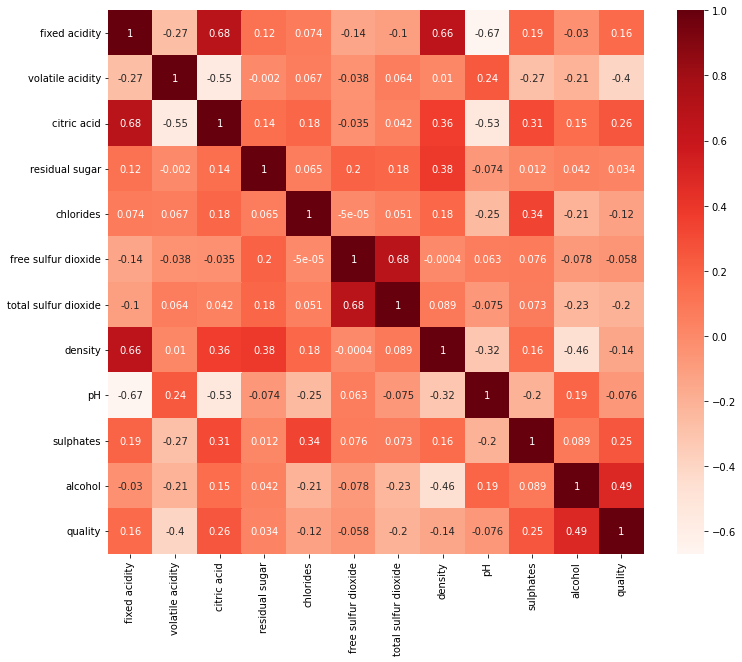

In [ ]:
# Using Pearson Correlation to view overall relationship between each other within df_train
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 1.2.7 Data preparation

#### 1.2.7.1 Dummy Creation

In [ ]:
# dummy creation
df_train_with_dummy = pd.get_dummies(x_train).copy()
df_train_with_dummy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1438,7.0,0.59,0.00,1.7,0.052,3.0,8.0,0.99600,3.41,0.47,10.3
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5
938,7.2,0.38,0.38,2.8,0.068,23.0,42.0,0.99356,3.34,0.72,12.9
215,7.0,0.49,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5
60,8.8,0.40,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2


In [ ]:
# to view its column 
features = df_train_with_dummy.columns
features 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# define df_test wuith dummy (x)
df_test_with_dummy = pd.get_dummies(x_test).copy()

df_test_with_dummy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
875,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.80
772,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.40
1395,8.6,0.685,0.10,1.6,0.092,3.0,12.0,0.99745,3.31,0.65,9.55
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.00
1489,6.2,0.570,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.80


In [ ]:
# specify test col
df_test_with_dummy_features = df_test_with_dummy.columns
df_test_with_dummy_features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### 1.2.8 Creating Equation & Evaluate its Perfomance

#### 1.2.8.1 define a function to evaluate equation performance

In [ ]:
def linear_model(feature):
    X = df_train_with_dummy[feature]
    y = df_train['quality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1994)
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_sc = ss.transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_sc, y_train)
    lr_r2 = lr.score(X_train_sc, y_train)
    lr_r2_cv = cross_val_score(lr,X_train_sc, y_train, cv=5).mean() 
    lr_validate_r2 = lr.score(X_test_sc, y_test)
    lr_rmse = np.abs(cross_val_score(lr, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
    lr_rmse_test = np.abs(cross_val_score(lr, X_test_sc, y_test, cv=5, scoring='neg_root_mean_squared_error')).mean()
    print('Linear model R2',lr_r2)
    print('Linear model R2 on unseen data', lr_r2_cv )
    print('Linear model R2 on validation data',lr_validate_r2)
    print('Linear model RMSE',lr_rmse)
    print('Linear model RMSE validation data',lr_rmse_test)
    print()
    
    ridge = RidgeCV(alphas = np.linspace(0.1,10,100))
    ridge.fit(X_train_sc, y_train)
    ridge_r2_cv = cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()
    ridge_validate_r2 = ridge.score(X_test_sc, y_test)
    ridge_rmse = np.abs(cross_val_score(ridge, X_train_sc ,y_train ,cv=5, scoring='neg_root_mean_squared_error')).mean()
    ridge_rmse_test = np.abs(cross_val_score(ridge, X_test_sc, y_test, cv=5, scoring='neg_root_mean_squared_error')).mean()
    print('Ridge model R2', ridge.score(X_train_sc, y_train))
    print('Ridge model R2 on unseen data', ridge_r2_cv )
    print('Ridge model R2 on validation data',ridge_validate_r2)
    print('Ridge model RMSE',ridge_rmse)
    #print('Ridge model intercept',ridge.intercept_)
    print('Ridge model RMSE validation data',ridge_rmse_test)
    print()
    
    lasso = LassoCV(n_alphas = 1000)
    lasso.fit(X_train_sc, y_train)
    lasso_r2_cv = cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()
    lasso_validate_r2 = lasso.score(X_test_sc, y_test)
    lasso_rmse = np.abs(cross_val_score(lasso, X_train_sc ,y_train ,cv=5, scoring='neg_root_mean_squared_error')).mean()
    lasso_rmse_test = np.abs(cross_val_score(lasso, X_test_sc, y_test, cv=5, scoring='neg_root_mean_squared_error')).mean()
    print('Lasso model R2', lasso.score(X_train_sc, y_train))
    print('Lasso model R2 on unseen data', lasso_r2_cv )
    print('Lasso model R2 on validation data',lasso_validate_r2)
    print('Lasso model RMSE',lasso_rmse)
    #print('Lasso model intercept',lasso.intercept_)
    print('Lasso model RMSE validation data',lasso_rmse_test)
    
    df_coef = pd.DataFrame()
    df_coef['variable'] = feature
    df_coef['lr_coef'] = lr.coef_
    df_coef['ridge_coef'] = ridge.coef_
    df_coef['lasso_coef'] = lasso.coef_
    return df_coef

#### 1.2.8.2 call the function 

In [ ]:
# call the function to see the model perfomance with dummy added
linear_model(features)

Linear model R2 0.3766660088588323
Linear model R2 on unseen data 0.3622390212252007
Linear model R2 on validation data 0.3606732804835475
Linear model RMSE 0.6296966190505102
Linear model RMSE validation data 0.6913064733906307

Ridge model R2 0.3766239477462142
Ridge model R2 on unseen data 0.36265289506106174
Ridge model R2 on validation data 0.360677330572011
Ridge model RMSE 0.6294938699422895
Ridge model RMSE validation data 0.6873203453292505

Lasso model R2 0.3739944004796599
Lasso model R2 on unseen data 0.36131237156648266
Lasso model R2 on validation data 0.3580649829883643
Lasso model RMSE 0.6301544832873075
Lasso model RMSE validation data 0.6996215807293804


,variable,lr_coef,ridge_coef,lasso_coef
0,fixed acidity,0.055079,0.057612,0.004461
1,volatile acidity,-0.175969,-0.173658,-0.165492
2,citric acid,-0.038649,-0.034055,-0.000000
3,residual sugar,0.036676,0.037894,0.014613
4,chlorides,-0.075900,-0.075574,-0.069190
5,free sulfur dioxide,0.033183,0.031400,0.013550
6,total sulfur dioxide,-0.122469,-0.120856,-0.103954
7,density,-0.037562,-0.042456,-0.000000
8,pH,-0.068643,-0.064687,-0.067633
9,sulphates,0.145123,0.144221,0.127682


#### 1.2.8.3 Selecting the best Linear Regression Model

- from this case , we found that RMSE from Ridge Form is the lowest value - Linear with Ridge Regression model will be selected

### 1.2.9 Interprete regression Coefficient of your best Model

- from info given in topic 1.2.8.2 , we found that most 5  variables which afffect with Quality of wines (without consideration for direction (use absolute value)  ) are `Aocohol > Volatile Aciddity > Sulphate > total sulfur dioxide > Chorides `

### 1.2.10 Choose your best model for prediction

#### 1.2.10.1 try to test with test_data


In [ ]:
from sklearn import linear_model 
from sklearn.linear_model import Ridge

In [ ]:
ridge_linear_model = linear_model.Ridge( alpha = 10,max_iter= 100 , tol = 0.1)

In [ ]:
ridge_linear_model.fit(x_train ,y_train)

Ridge(alpha=10, max_iter=100, tol=0.1)

#### 1.2.10.2 to view score comparison between train & test

#### 1.2.10.3 Try to find predicted y from Linear Regression Model ( Default Equation)

In [ ]:
model = linear_model.Ridge( alpha = 10,max_iter= 100 , tol = 0.1)
feature_x = df_train_with_dummy[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol']]
target_y = df_train['quality']
model.fit(feature_x , target_y)

Ridge(alpha=10, max_iter=100, tol=0.1)

In [ ]:
x_test_given = df_test_with_dummy[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol']]


predicted_y = model.predict(x_test_given)
predicted_y[1:4]


array([4.94252914, 5.30481809, 6.04861296])

In [ ]:
# call it as dataframe
y_data = {
                    "y_predicted" : predicted_y ,
                    "y_actual"    : df_test['quality'] ,
                    "error_percentage"     : abs( (predicted_y - df_test['quality'])/df_test['quality'] )*100
                  }

predicted_y_df = pd.DataFrame(y_data) 
predicted_y_df.head()

,y_predicted,y_actual,error_percentage
875,6.420884,7,8.273086
772,4.942529,5,1.149417
1395,5.304818,6,11.586365
1078,6.048613,5,20.972259
1489,5.781503,6,3.641611


In [ ]:
# to find model performance manually
print("model Performance (%) = ",  100 - predicted_y_df['error_percentage'].mean()   )

model Performance (%) =  89.55057533414262
